In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [40]:
home_url = "https://www.bbc.com/zhongwen/trad" 
r = requests.get(home_url)
soup = BeautifulSoup(r.text, "lxml")

In [7]:
def handle_url( url ):
    base_url = "https://www.bbc.com"
    if url.startswith('https://') or url.startswith('http://'):
        return url
    else:
        return "https://www.bbc.com" + url 


In [15]:
article_link = soup.findAll('a', "bbc-1fxtbkn evnt13t0")
article_soups = []
for a in article_link:
    url = handle_url(a['href'])
    print(url)
    r = requests.get(url)
    try:
        article_soup = BeautifulSoup(r.text, "lxml")
        print(article_soup.find('h1').text)
        article_soups.append(article_soup)
    except:
        print("url fail: ", url)
    

https://www.bbc.com/zhongwen/trad/chinese-news-60451327
香港疫情：在每天確診數萬的情況下染疫，BBC記者親身經歷求驗求診難
https://www.bbc.com/zhongwen/trad/world-60617395
俄羅斯入侵烏克蘭: 戰爭何去何從 BBC盤點五種可能結局
https://www.bbc.com/zhongwen/trad/world-60637229
俄羅斯入侵烏克蘭：歐洲和平何以一如既往地脆弱
https://www.bbc.com/zhongwen/trad/world-60617669
「我的城市正在遭到炮擊，但在俄國的媽媽不相信我」
https://www.bbc.com/zhongwen/trad/chinese-news-60630231
中國兩會：北京訂下5.5%經濟增長目標，分析形容「保守」
https://www.bbc.com/zhongwen/trad/business-60617063
中俄經貿關係：三個可能挑戰你常識的事實
https://www.bbc.com/zhongwen/trad/world-60618596
烏克蘭危機：走進北約監測俄羅斯活動的「空中之眼」預警機
https://www.bbc.com/zhongwen/trad/science-60632944
氣候變化：聯合國IPCC最新報告告訴我們的五個事實
https://www.bbc.com/zhongwen/trad/sports-60615520
北京冬殘奧會：因政治原因禁止運動員參賽公平嗎
https://www.bbc.com/zhongwen/trad/world-60614505
俄羅斯入侵烏克蘭、蓬佩奧訪台、中國兩會以及本周更多重要故事
https://www.bbc.com/zhongwen/trad/world-60536020
新聞專輯：俄羅斯入侵烏克蘭
https://www.bbc.com/zhongwen/trad/world-60618047
俄烏戰爭：為什麼現在開戰？普京想得到什麼？
https://www.bbc.com/zhongwen/trad/world-60618809
俄羅斯入侵烏克蘭：俄進一步加強媒體管制，前線記者如何看待這場戰爭中的信息戰
ht

In [63]:
def handle_article(article_soup):
    title = '' 
    try:
        title = article_soup.find('title').text
    except:
        pass

    author = ''
    try:
        author = article_soup.find(class_ = 'bbc-1a3w4ok e1c9i7u11').text
    except:
        pass

    text = "\n".join( a.text for a in article_soup.find_all(class_ = 'bbc-19j92fr e57qer20') )

    tags = ",".join( tag['content'] for tag in article_soup.find_all("meta", attrs={"name": "article:tag"}) )


    return title, author, text, tags


In [65]:
df = pd.DataFrame(
    data = [handle_article(a) for a in article_soups],
    columns = ['title', 'author', 'text', 'tags']
)
df

,title,author,text,tags
0,香港疫情：在每天確診數萬的情況下染疫，BBC記者親身經歷求驗求診難 - BBC News 中文,BBC中文記者,2月中旬，我的家人出現發燒、喉嚨痛、咳嗽等病症，使用自行購買的快速病毒抗原測試劑，結果呈陽性...,"新冠病毒疫情,香港,健康衛生"
1,俄羅斯入侵烏克蘭: 戰爭何去何從 BBC盤點五種可能結局 - BBC News 中文,詹姆士·蘭德爾（James Landale）,身處戰爭的硝煙迷霧中，可能很難看到前方的出路。戰場上傳來的消息、各國外交上的喧囂、痛失親人流...,"烏克蘭局勢升溫,俄國,政治,弗拉基米爾·普京,北大西洋公約組織,軍事,烏克蘭"
2,俄羅斯入侵烏克蘭：歐洲和平何以一如既往地脆弱 - BBC News 中文,凱文·康諾利（Kevin Connolly）,有些時候，歷史板塊就在我們腳下移動，猛烈地重塑歐洲。現在是時候認識到，我們正處於這樣一個時刻...,"烏克蘭局勢升溫,俄國,烏克蘭"
3,「我的城市正在遭到炮擊，但在俄國的媽媽不相信我」 - BBC News 中文,瑪麗亞·科倫紐克和傑克·古德曼（Maria Korenyuk and Jack Goodman）,炮擊以來，奧萊克桑德拉和她的4隻救援犬一直躲在公寓的浴室中。\n「當我聽到第一聲爆炸時，我跑...,"烏克蘭局勢升溫,俄國,烏克蘭"
4,中國兩會：北京訂下5.5%經濟增長目標，分析形容「保守」 - BBC News 中文,None,中國政府把今年經濟增長目標定於5.5%，比去年訂下的目標略低，分析形容這個目標「保守」，反映...,"烏克蘭局勢升溫,新冠病毒疫情,中國,台灣,香港,經濟,軍事,澳門,烏克蘭"
5,中俄經貿關係：三個可能挑戰你常識的事實 - BBC News 中文,None,「在複雜的國際局勢下，我們看到中國老朋友的友誼，謝謝大家。」\n「美、法、德、意、加、英的朋...,"烏克蘭局勢升溫,俄國,中國,經濟,貿易,烏克蘭"
6,烏克蘭危機：走進北約監測俄羅斯活動的「空中之眼」預警機 - BBC News 中文,None,俄羅斯入侵烏克蘭使北約在歐洲的行動正在加強，尤其是在東部的偵查活動。\n特殊的預警機在北約邊...,"北大西洋公約組織,軍事"
7,氣候變化：聯合國IPCC最新報告告訴我們的五個事實 - BBC News 中文,麥特·馬格拉斯（Matt McGrath）,聯合國政府間氣候變化專門委員會（IPCC）近日發表的最新報告，審視了氣候變化的成因、影響與對...,"環境,聯合國,氣候變化"
8,北京冬殘奧會：因政治原因禁止運動員參賽公平嗎 - BBC News 中文,費爾南多·杜亞特 (Fernando Duarte),國際殘奧委會（IPC）已成為最新一個對俄羅斯實施制裁的體育組織。\n就在冬殘奧會開幕前24小...,"奧運會,烏克蘭局勢升溫,俄國,體育,中國,冬奧會"
9,俄羅斯入侵烏克蘭、蓬佩奧訪台、中國兩會以及本周更多重要故事 - BBC News 中文,None,俄羅斯入侵烏克蘭進入第二個星期，烏克蘭軍民繼續頑強抵抗，總統澤連斯基斯呼籲北約組織要給予更多...,"烏克蘭局勢升溫,新冠病毒疫情,中國,台灣,美國,香港,軍事,烏克蘭"


ValueError: Received invalid argument(s): k

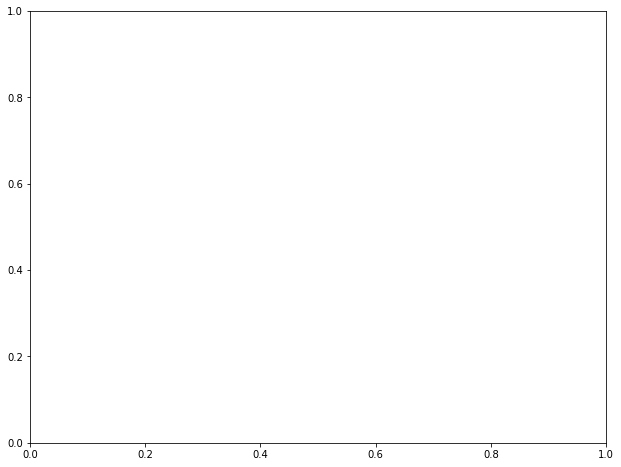

In [76]:
tag_relation = []
for tag_str in df['tags']:
    tag_list = tag_str.split(',')
    tag_relation.extend([ (a,b) for a in tag_list for b in tag_list])
plt.figure(figsize=(8,6)) 
G = nx.Graph()
G.add_edges_from(tag_relation)
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_size=3000, font_size=20, font_family='PingFang TC', k=0.2)
plt.show()
